<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #191970; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Makine Öğrenmesiyle Öğrencilerin Yaşam Alışkanlıkları ve Akademik Durumlarına Göre Depresyon Riskinin Tahmini</h1>
</div>

# **1) Proje Tanımı**

        Amaç, öğrencilerin yaşam tarzı alışkanlıkları (uyku, sosyal aktivite, stres, fiziksel aktivite, çalışma saati vb.) ve akademik performans  göstergeleri (CGPA, ders çalışma saatleri, akademik tatmin) kullanılarak depresyon yaşayıp yaşamadıklarını tahmin eden bir makine öğrenmesi modeli geliştirmektir.

# **2) Veri Kaynakları**

## **2.1) Dataset 1** : Daily Lifestyle and Academic Performance

- 2.000 öğrenciden Google Form anketiyle toplanan verileri içerir.

- Ders çalışma süresi, sosyal etkinlikler, uyku, sosyalleşme, fiziksel aktivite, stres düzeyi ve not ortalaması bilgilerini kapsar.

- Veriler, Ağustos 2023 - Mayıs 2024 akademik yılına aittir.

- Katılımcıların çoğu Hindistan’daki öğrencilerden oluşmaktadır.

- **Amaç:** Günlük alışkanlıkların akademik başarı ve öğrenci refahı üzerindeki etkisini incelemek.

## 2.2) Dataset 2 : Student Mental Health

- Öğrencilerin ruh sağlığı ve depresyon riskini etkileyen faktörleri kapsamlı şekilde içerir.

- Demografik bilgiler, akademik ve iş baskıları, yaşam tarzı alışkanlıkları ve ruh sağlığı göstergelerini kapsar.

- **Amaç:** Depresyon eğilimlerini ve risk faktörlerini analiz etmek.

# **3) Yüklemeler ve İlk Kontroller**

### Paketlerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             classification_report, roc_auc_score, roc_curve, PrecisionRecallDisplay)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import joblib

### Veri Yükleme

In [2]:
df1 = pd.read_csv("./datasets/student_lifestyle_dataset.csv")
df2 = pd.read_csv("./datasets/student_depression_dataset.csv")

### Temel Veri Bilgileri

In [3]:
print("\nDataset 1")
print(f"Shape (rows, columns): {df1.shape}")
print("\nFirst 5 rows:")
display(df1.head())

print("\n\n")

print("\nDataset 2")
print(f"Shape (rows, columns): {df2.shape}")
print("\nFirst 5 rows:")
display(df2.head())


Dataset 1
Shape (rows, columns): (2000, 8)

First 5 rows:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High






Dataset 2
Shape (rows, columns): (27901, 18)

First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Genel Bilgi

In [4]:
print("\nDataset 1")
display(df1.info())

print("\n\n")

print("\nDataset 2")
display(df2.info())


Dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


None





Dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

None

### İstatiksel Özeti

#### Dataset 1

In [5]:
display(df1.drop(['Student_ID'],axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.3,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.0,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.2,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.2,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.4,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.9,3.11,3.33,4.0


1. **Veri Kümesi Boyutları**:
   - Satir: 2,000
   - Sütun: 8
   - Sütunların hiçbirinde eksik değere rastlanmadı.

2. **Veri Türleri**:
   - Veri kümesi şunları içerir:
     - Sayısal sütunlar: 6 (örneğin, aktivitelere harcanan saatler ve not ortalaması).
     - Kategorik sütun: 1 (Stres Düzeyi).
     - ID Sütunu: 1 (Student_ID).

#### **İlk Gözlemler**
1. **Dengeli Yaşam Tarzı**:
   - Öğrencilerin ders çalışmaya, uykuya ve fiziksel aktiviteye harcadıkları ortalama saatlerin birbirine yakın olması, öğrenciler arasında nispeten dengeli bir yaşam tarzının olduğunu göstermektedir.

2. **GPA ve Yaşam Tarzı Korelasyonu**:
   - Nispeten yüksek ortalama not ortalaması, dengeli yaşam tarzı alışkanlıkları (örneğin yeterli uyku ve çalışma) ile akademik performans arasında olası pozitif bir ilişki olduğunu düşündürmektedir.

3. **Stres Seviyeleri**:
   - Kategorik bir özellik olarak, bunun GPA ve diğer değişkenlerle korelasyonları daha detaylı incelenebilir.

4. **Aykırı Değerler**:
   - Fiziksel aktivite saatleri (maksimum: 13 saat) bazı öğrencilerin olağanüstü derecede aktif olduğunu göstermektedir.
   - Sosyalleşme saatleri de değişkendir ve günlük 6 saate kadar çıkabilir, bu da çeşitli sosyal alışkanlıkların göstergesidir.

#### Dataset 2

In [6]:
display(df2.drop(['id','Depression'],axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0


1. **Veri Kümesi Boyutları**
    - Satır: 27,901
    - Sütun: 18
    - Eksik Değer: Hiçbir sütunda eksik değer bulunmamaktadır.

2. **Veri Türleri**
   - Sayısal sütunlar: 9 (yaş, akademik baskı, iş baskısı, CGPA, çalışma memnuniyeti, iş memnuniyeti, çalışma/öğrenim saatleri vb.)
   - Kategorik sütunlar: 8 (cinsiyet,şehir,beslenme alışkanlıkları, family history vb.)
   - ID Sütunu: 1 (ID)

#### **İlk Gözlemler**

1. **Demografik Dağılım (Age)**
   - Ortalama yaş 25.82, minimum 18, maksimum 59 olarak gözlenmiştir.
   - Bu, veri kümesinde hem üniversite öğrencilerini hem de mezun/çalışan bireyleri içeren geniş bir yaş aralığına işaret etmektedir.

2. **Akademik Baskı ve CGPA**
   - Akademik Baskı (mean = 3.14) orta seviyededir.
   - CGPA ortalaması 7.65 olup, bu değer oldukça iyi bir akademik performansa işaret eder.
   - Bu iki değişkenin birlikte incelenmesi, akademik baskının başarı üzerindeki etkisini anlamada kritik olacaktır.

3. **Çalışma Memnuniyeti (Study Satisfaction)**
   - Ortalama 2.94, medyan 3.0, bu da memnuniyetin orta düzeyde olduğunu gösterir.
   - Akademik baskı ve çalışma memnuniyeti birlikte analiz edildiğinde, baskı arttıkça memnuniyetin azalıp azalmadığı değerlendirilebilir.

4. **Aykırı Değerler**
   - Work Pressure ve Job Satisfaction değişkenlerinde 5 ve 4 değerlerine kadar çıkan seyrek yüksek değerler, aykırı gözlemler olabilir.
   - Age değişkeninde 59 yaşa kadar çıkılması da, bazı katılımcıların öğrenci dışı profilde olabileceğini düşündürmektedir. 

#  **4) Birleştirme Stratejisi**

**Amaç:** Birleştirme sonucunda, öğrencilerin günlük yaşam alışkanlıklarının (uyku, çalışma süresi, sosyal aktivite vb.) depresyon riski üzerindeki etkisini analiz etmek.

## 4.1. Ortak ID Anahtar Üzerinden


   - ### Sütun İsimlerini Kontrol Etme

In [7]:
print("Dataset 1: ",df1.columns)

print("\n")

print("Dataset 2: ",df2.columns)

Dataset 1:  Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


Dataset 2:  Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


  #### Her iki veri setinde de bir benzersiz kimlik var. Bu, bir “anahtar” gibi kullanılacaktır.

- ### Sütun İsimlerini Düzenle
     Kolaylık için id sütununu Student_ID olarak yeniden adlandıralım

In [8]:
df2.rename(columns={'id': 'Student_ID'}, inplace=True)

- ### Ortak Anahtar Üzerinden Birleştirme
      df1’deki tüm öğrenciler, df2’de varsa mental sağlık bilgisiyle eşleşir.

In [9]:
merged_df = pd.merge(df1, df2, on='Student_ID', how='left')

In [10]:
print("\nBirleştirilmiş veri seti boyutu:", merged_df.shape)


Birleştirilmiş veri seti boyutu: (2000, 25)


- ### Nihai veri seti kaydetme

In [11]:
merged_df.to_csv("./datasets/Merged_Student_Lifestyle_MentalHealth.csv", index=False)

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #90e0ef; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #38040e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Keşifsel Veri Analizi (EDA)</h1>
</div>

- ## **Amaç:** Verinin yapısını anlamak, türleri, eksik değerleri, çift kayıtları görmek vb.

### 1. İlk 5 satır

In [12]:
merged_df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Gender,Age,...,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,Male,33.0,...,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Boyut ve sütun tipleri

In [13]:
print("Shape:", merged_df.shape)
print("\n",merged_df.dtypes)

Shape: (2000, 25)

 Student_ID                                 int64
Study_Hours_Per_Day                      float64
Extracurricular_Hours_Per_Day            float64
Sleep_Hours_Per_Day                      float64
Social_Hours_Per_Day                     float64
Physical_Activity_Hours_Per_Day          float64
GPA                                      float64
Stress_Level                              object
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object


### 1.3 Özet istatistik (sayısal)


In [14]:
merged_df.drop(['Student_ID','Depression'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,7.475800,1.423888,5.00,6.300,7.40,8.700,10.00
Extracurricular_Hours_Per_Day,2000.0,1.990100,1.155855,0.00,1.000,2.00,3.000,4.00
Sleep_Hours_Per_Day,2000.0,7.501250,1.460949,5.00,6.200,7.50,8.800,10.00
Social_Hours_Per_Day,2000.0,2.704550,1.688514,0.00,1.200,2.60,4.100,6.00
Physical_Activity_Hours_Per_Day,2000.0,4.328300,2.514110,0.00,2.400,4.10,6.100,13.00
GPA,2000.0,3.115960,0.298674,2.24,2.900,3.11,3.330,4.00
Age,399.0,25.593985,4.945488,18.00,21.000,25.00,29.500,39.00
Academic Pressure,399.0,3.087719,1.403450,1.00,2.000,3.00,4.000,5.00
Work Pressure,399.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
CGPA,399.0,7.611604,1.462645,5.11,6.165,7.70,8.935,9.97


### 1.4 Duplicate kontrolü (aynı Student_ID)

In [15]:
merged_df[merged_df.duplicated(subset='Student_ID', keep=False)].shape

(0, 25)

### 1.5 Kategorik değişkenlerin frekansları

In [16]:
for col in merged_df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(merged_df[col].value_counts(dropna=False).head(20))


--- Stress_Level ---
Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

--- Gender ---
Gender
NaN       1601
Male       216
Female     183
Name: count, dtype: int64

--- City ---
City
NaN            1601
Lucknow          24
Kalyan           23
Srinagar         21
Thane            18
Vasai-Virar      18
Kolkata          18
Agra             16
Ludhiana         16
Surat            15
Hyderabad        15
Bhopal           15
Rajkot           15
Mumbai           14
Pune             14
Ahmedabad        14
Jaipur           14
Vadodara         13
Varanasi         12
Ghaziabad        12
Name: count, dtype: int64

--- Profession ---
Profession
NaN                 1601
Student              398
'Civil Engineer'       1
Name: count, dtype: int64

--- Sleep Duration ---
Sleep Duration
NaN                    1601
'Less than 5 hours'     120
'7-8 hours'             106
'5-6 hours'              92
'More than 8 hours'      81
Name: count, dtype: int64

--- Dietary

- ## Eksik veriler (Missing values)

### **Amaç:** Hangi sütunlarda kaç tane eksik var, eksiklerin yapısına göre strateji seçecektir.

### 2.1 Eksik değer sayısı ve oranı

In [17]:
miss = merged_df.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged_df) * 100).round(2)
pd.concat([miss, miss_percent], axis=1, keys=['count', 'percent']).head(30)

,count,percent
Academic Pressure,1601,80.05
Work Pressure,1601,80.05
Family History of Mental Illness,1601,80.05
Financial Stress,1601,80.05
Work/Study Hours,1601,80.05
Have you ever had suicidal thoughts ?,1601,80.05
Degree,1601,80.05
Dietary Habits,1601,80.05
Sleep Duration,1601,80.05
Job Satisfaction,1601,80.05


## Eksik oranı %50 den yüksek ve projeye katkısı olmayan tüm sütunlar çıkarılacaktır

### Çıkarılan sütunlar

In [18]:
merged_df = merged_df.drop(columns=['Gender','Job Satisfaction','CGPA','Profession','Sleep Duration','Age',
                                    'Have you ever had suicidal thoughts ?','Degree','City','Work/Study Hours','Dietary Habits',
                                   'Family History of Mental Illness','Financial Stress','Work Pressure','Study Satisfaction','Student_ID'])

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Academic Pressure                399 non-null    float64
 8   Depression                       399 non-null    float64
dtypes: float64(8), object(1)
memory usage: 140.8+ KB


- #### Eksik değer sayısı ve oranı

In [20]:
miss = merged_df.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged_df) * 100).round(2)
pd.concat([miss, miss_percent], axis=1, keys=['count', 'percent']).head(30)

,count,percent
Academic Pressure,1601,80.05
Depression,1601,80.05
Study_Hours_Per_Day,0,0.00
Extracurricular_Hours_Per_Day,0,0.00
Sleep_Hours_Per_Day,0,0.00
Social_Hours_Per_Day,0,0.00
Physical_Activity_Hours_Per_Day,0,0.00
GPA,0,0.00
Stress_Level,0,0.00


- #### Eksik değer sayısı ve oranı

In [21]:
miss = merged_df.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged_df) * 100).round(2)
pd.concat([miss, miss_percent], axis=1, keys=['count', 'percent']).head(30)

,count,percent
Academic Pressure,1601,80.05
Depression,1601,80.05
Study_Hours_Per_Day,0,0.00
Extracurricular_Hours_Per_Day,0,0.00
Sleep_Hours_Per_Day,0,0.00
Social_Hours_Per_Day,0,0.00
Physical_Activity_Hours_Per_Day,0,0.00
GPA,0,0.00
Stress_Level,0,0.00


### Yeni dataframe'in boyutu

In [22]:
merged_df.shape

(2000, 9)

In [23]:
merged_df.sample(5)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Academic Pressure,Depression
521,5.3,3.8,9.7,4.1,1.1,3.13,Low,2.0,0.0
1581,7.1,2.0,7.4,1.6,5.9,2.86,Moderate,1.0,0.0
1548,8.4,0.3,7.0,5.8,2.5,2.90,High,NaN,NaN
572,5.8,1.2,6.5,5.2,5.3,3.08,Low,NaN,NaN
893,6.8,3.5,8.6,0.6,4.5,3.23,Moderate,NaN,NaN


# Stres Düzeyi için Etiket Kodlaması (Label Encoding)

In [24]:
merged_df['Stress_Level'] = merged_df['Stress_Level'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

In [25]:
merged_df.sample(6)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Academic Pressure,Depression
403,9.8,1.7,9.9,1.7,0.9,3.75,2,NaN,NaN
299,8.7,3.5,6.1,0.5,5.2,3.37,2,NaN,NaN
997,5.8,1.4,7.0,0.3,9.5,2.49,0,NaN,NaN
1110,9.6,2.0,9.2,1.4,1.8,3.64,2,NaN,NaN
407,7.4,3.3,7.3,2.1,3.9,3.34,1,1.0,0.0
1319,9.7,0.2,6.1,3.4,4.6,3.81,2,NaN,NaN


# Akademik Baskı sütunundaki eksik değerler tahmin etme

  - # Strateji: Makine Öğrenmesi Tabanlı Tahmini Kullanması
       ### Diğer özelliklere dayanarak Akademik Baskıyı tahmin etmek için küçük bir regresyon/sınıflandırma modeli oluşturacağız.

#### Bilinen ve bilinmeyen Akademik Baskı ayırma

In [26]:
known_ap = merged_df[merged_df['Academic Pressure'].notnull()]
unknown_ap = merged_df[merged_df['Academic Pressure'].isnull()]

#### Akademik Baskıyı Tahmin Etmeye Yardımcı Özellikler

In [27]:
features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
            'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
            'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']

#### Bilinen veriler üzerinde model eğitimi

In [28]:
X_known = known_ap[features]
y_known = known_ap['Academic Pressure']

#### Küçük eksik boşlukları geçici olarak doldurma (ortalama/medyan)

In [29]:
imputer = SimpleImputer(strategy='median')
X_known = imputer.fit_transform(X_known)

In [30]:
model_ap = RandomForestRegressor(random_state=42)
model_ap.fit(X_known, y_known)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Eksik değerleri tahmin etme

In [31]:
X_unknown = imputer.transform(unknown_ap[features])
predicted_ap = model_ap.predict(X_unknown)
predicted_ap

array([3.6 , 2.95, 3.45, ..., 4.  , 2.87, 3.21], shape=(1601,))

#### Tahmin edilen değerleri atama (en yakın Likert ölçeğine yuvarlanmış)

In [32]:
merged_df.loc[merged_df['Academic Pressure'].isnull(), 'Academic Pressure'] = predicted_ap.round().clip(1, 5)

### Özet İstatistikler

In [33]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,7.475800,1.423888,5.00,6.3,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.990100,1.155855,0.00,1.0,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.501250,1.460949,5.00,6.2,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.704550,1.688514,0.00,1.2,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.328300,2.514110,0.00,2.4,4.10,6.10,13.0
GPA,2000.0,3.115960,0.298674,2.24,2.9,3.11,3.33,4.0
Stress_Level,2000.0,1.366000,0.727536,0.00,1.0,2.00,2.00,2.0
Academic Pressure,2000.0,3.098000,0.771164,1.00,3.0,3.00,3.00,5.0
Depression,399.0,0.566416,0.496191,0.00,0.0,1.00,1.00,1.0


## Bu şekilde:

   - #### Stres, not ortalaması ve aktivite seviyeleri arasındaki korelasyonları korumaktadır.

   - #### Sadece ortalama/medyan tahminini kullanarak oluşabilecek önyargılardan kaçınmaktadır.

   - #### Akademik Baskıyı gerçekçi (1-5 arasında) tutmaktadır.

# Depresyon Sütununun Akıllı Tahmini

In [34]:
# Use the 399 labeled rows to train a depression model
known_dep = merged_df[merged_df['Depression'].notnull()]
unknown_dep = merged_df[merged_df['Depression'].isnull()]

X_known = known_dep.drop(columns=['Depression'])
y_known = known_dep['Depression']

# Simple imputation
X_known = imputer.fit_transform(X_known)
X_unknown = imputer.transform(unknown_dep.drop(columns=['Depression']))

# Train model
from sklearn.ensemble import RandomForestClassifier
model_dep = RandomForestClassifier(random_state=42)
model_dep.fit(X_known, y_known)

# Predict depression for unlabeled data
predicted_dep = model_dep.predict(X_unknown)

# Store predictions in a new column
merged_df.loc[merged_df['Depression'].isnull(), 'Predicted_Depression'] = predicted_dep

#### Hedef sütunumuz Depresyon'da bazı eksik değerler var. Önceki bir modelden bir Tahmin Edilen Depresyon sütunumuz zaten mevcut olduğundan, eksik değerleri akıllıca doldurmak için bunu kullanacağız ve ardından önyargıyı önlemek için verileri yeniden dengeleyeceğiz.

- #### Depression sütunundaki eksik değer sayısı

In [35]:
missing_count = merged_df['Depression'].isna().sum()
print('Depression Eksik Değerler: ',int(missing_count))

Depression Eksik Değerler:  1601


- #### Ayrıca, doldurmadan önce mevcut Depresyon sınıflarının oranını da görselleştireceğiz

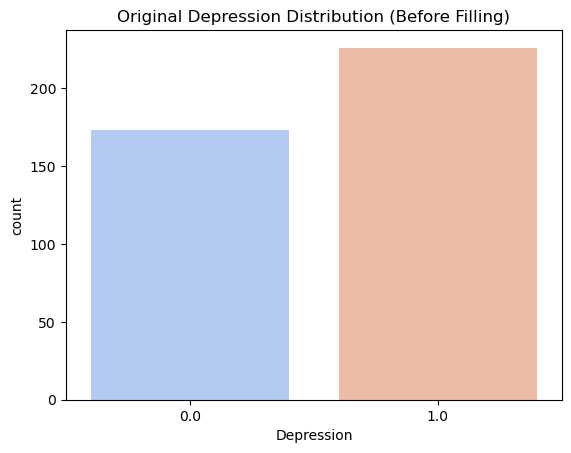

Original distribution:
Depression
1.0    0.566416
0.0    0.433584
Name: proportion, dtype: float64


In [36]:
sns.countplot(x='Depression', hue='Depression', data=merged_df, palette='coolwarm', legend=False)
plt.title("Original Depression Distribution (Before Filling)")
plt.show()

print("Original distribution:")
print(merged_df['Depression'].value_counts(normalize=True))

- #### Tahmin edilen Depression sınıfının oranını görleştirme

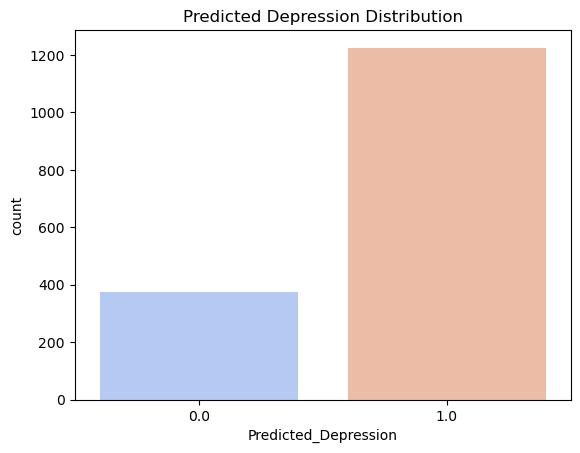

Predicted distribution:
Predicted_Depression
1.0    0.765147
0.0    0.234853
Name: proportion, dtype: float64


In [37]:
sns.countplot(x='Predicted_Depression', hue='Predicted_Depression', data=merged_df, palette='coolwarm', legend=False)
plt.title("Predicted Depression Distribution")
plt.show()

print("Predicted distribution:")
print(merged_df['Predicted_Depression'].value_counts(normalize=True))

- #### Şimdi eksik Depresyon değerlerini mevcut Predicted_Depression sütununu kullanarak dolduracağız.

In [38]:
merged_df['Depression'] = merged_df['Depression'].fillna(merged_df['Predicted_Depression'])

In [39]:
print("After filling missing values:")
print(merged_df['Depression'].isna().sum(), "missing values remain")

After filling missing values:
0 missing values remain


- #### Doldurma işleminden sonra dağılımın nasıl değiştiğini artık kontrol edebiliriz.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17444\2454793689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_dist.index, y=new_dist.values, palette='coolwarm')


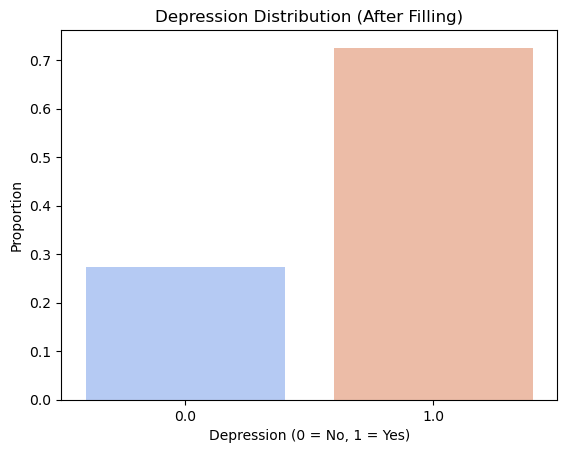

New distribution after filling:
Depression
1.0    0.7255
0.0    0.2745
Name: proportion, dtype: float64


In [40]:
new_dist = merged_df['Depression'].value_counts(normalize=True)
sns.barplot(x=new_dist.index, y=new_dist.values, palette='coolwarm')
plt.title("Depression Distribution (After Filling)")
plt.ylabel("Proportion")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.show()

print("New distribution after filling:")
print(new_dist)

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
 7   Academic Pressure                2000 non-null   float64
 8   Depression                       2000 non-null   float64
 9   Predicted_Depression             1601 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 156.4 KB


- #### Kullandığımız Predicted_Depression Sütunu atmak

In [42]:
merged_df = merged_df.drop(['Predicted_Depression'],axis=1)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
 7   Academic Pressure                2000 non-null   float64
 8   Depression                       2000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 140.8 KB


- ### Histogramlar / yoğunluk

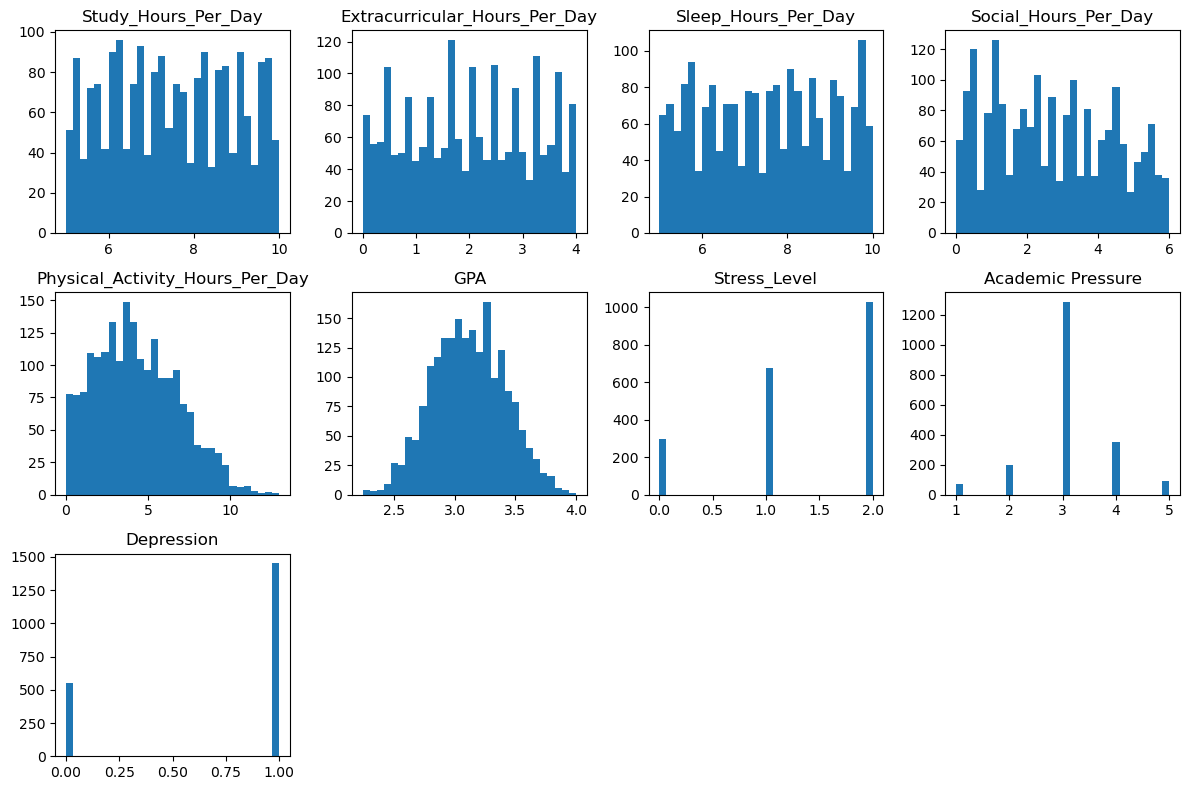

In [44]:
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    plt.hist(merged_df[col].dropna(), bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

- ### aykırı görselleştirme

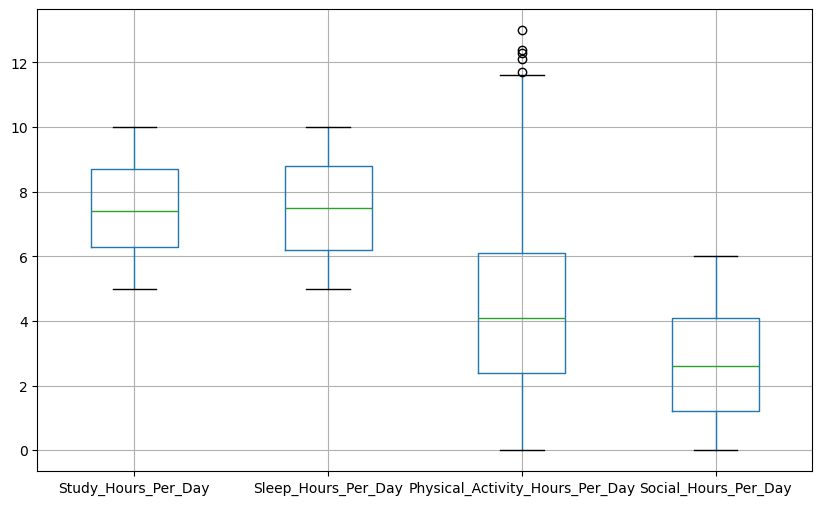

In [45]:
plt.figure(figsize=(10, 6))
merged_df.boxplot(column=['Study_Hours_Per_Day','Sleep_Hours_Per_Day','Physical_Activity_Hours_Per_Day','Social_Hours_Per_Day'])
plt.show()

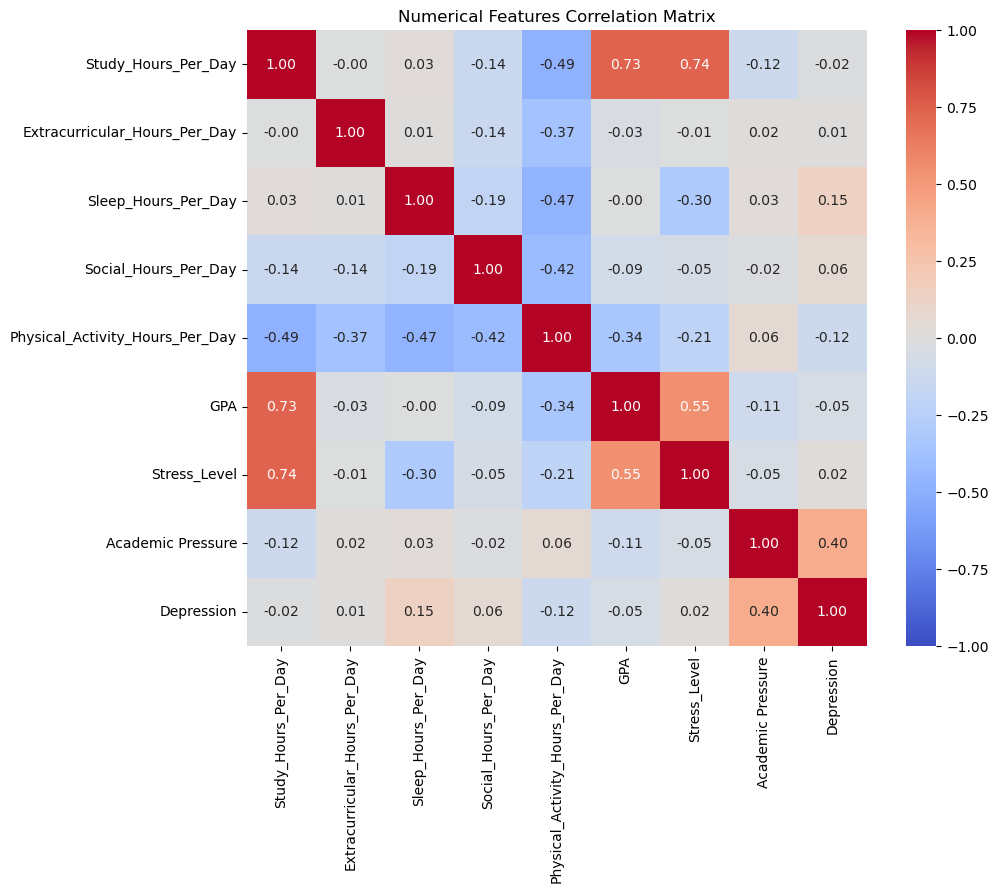

In [46]:
corr = merged_df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True,        
    fmt=".2f",         
    cmap='coolwarm',  
    vmin=-1, vmax=1    
)
plt.title("Numerical Features Correlation Matrix")
plt.show()

- #### Yapılan korelasyon analizi sonucunda, depresyon değişkeniyle en yüksek pozitif ilişkiye sahip değişkenin “Academic Pressure” olduğu görülmüştür (r ≈ 0.30). Bu sonuç, akademik baskı arttıkça öğrencilerde depresyon olasılığının da arttığını göstermektedir.

- #### Ayrıca “Physical Activity Hours Per Day” değişkeni depresyonla en güçlü negatif korelasyonu göstermiştir (r ≈ -0.10). Bu durum, fiziksel aktivite düzeyi yükseldikçe depresyon riskinin azaldığını ifade etmektedir.

- #### Diğer değişkenlerin (“Study Hours”, “Sleep Hours”, “Stress Level”, “GPA” vb.) depresyon ile olan korelasyonları oldukça düşük bulunmuştur. Bu da bu değişkenlerin depresyon üzerinde belirgin bir etkisinin olmadığını veya dolaylı etkilerinin olabileceğini göstermektedir.

- #### Sonuç olarak, depresyonu etkileyen en önemli faktörün akademik baskı, koruyucu bir faktörün ise fiziksel aktivite olduğu söylenebilir.

- ## Sayısal Verilerin Ölçeklendirilmesi

#### Veri setinde yer alan sayısal değişkenler farklı ölçeklerde olduğundan, modelin ağırlık öğrenmesini zorlaştırabilir. Bu nedenle tüm sayısal değerler benzer aralıklara dönüştürülür.

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #90e0ef; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #38040e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Modelleme</h1>
</div>

## 1) Veri/Hedef Hazırlığı

**Amaç:** Modeli eğitmek için X (özellikler) ve y (target=Depression) hazırlama

In [47]:
y = merged_df['Depression']
X = merged_df.drop(columns=['Depression'])

## 2) Train/Test Veri Ayırma

**Amaç:** Veri setini eğitim ve test olarak ayırılmaktadır. stratify=y sınıf dağılımını korumaktadır.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))
X_train = X_train_resampled
y_train = y_train_resampled

Before SMOTE: Counter({1.0: 1161, 0.0: 439})
After SMOTE: Counter({1.0: 1161, 0.0: 1161})


## 3) Ölçeklendirme (Model Bazlı)

**Amaç:** SVM ve KNN için MinMaxScaler uygulayacağız; RandomForest ölçeklendirme gerektirmez.

- #### SVM/KNN için scale

In [50]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4) Modellerin tanımlanması ve temel eğitim

**Amaç:** Her model için basit parametrelerle baseline sonuçlarını almak.

In [51]:
# 1) Random Forest (no scaling, kullan X_train_sm)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2) SVM (RBF) (scaler kullanılmış X_train_scaled)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)  # dikkat: X_train_scaled ile train resample edilmiş hali kullanıldıysa aynı index ve shape olmalı

# Eğer X_train_sm kullanıldıysa, scale on it:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred_svm = svm.predict(X_test_scaled)

# 3) KNN (k=5 baseline)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

## 5) Değerlendirme metrikleri fonksiyonu

**Amaç:** Tek kod bloğuyla tüm metrikleri hesaplayıp raporlayalım.

In [52]:
def evaluate_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1-score:", round(f1, 4))

    if y_proba is not None:
        roc = roc_auc_score(y_true, y_proba)
        print("ROC AUC:", round(roc, 4))

    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print('confusion matrix',cm)

    # Görsel olarak göster
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

--- Random Forest ---
Accuracy: 0.87
Precision: 0.9161
Recall: 0.9034
F1-score: 0.9097
ROC AUC: 0.9165

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       110
         1.0       0.92      0.90      0.91       290

    accuracy                           0.87       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.87      0.87      0.87       400

confusion matrix [[ 86  24]
 [ 28 262]]


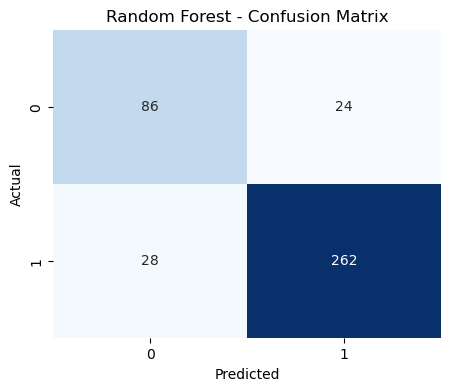

--- SVM (RBF) ---
Accuracy: 0.795
Precision: 0.9031
Recall: 0.8034
F1-score: 0.8504
ROC AUC: 0.8499

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.77      0.67       110
         1.0       0.90      0.80      0.85       290

    accuracy                           0.80       400
   macro avg       0.75      0.79      0.76       400
weighted avg       0.82      0.80      0.80       400

confusion matrix [[ 85  25]
 [ 57 233]]


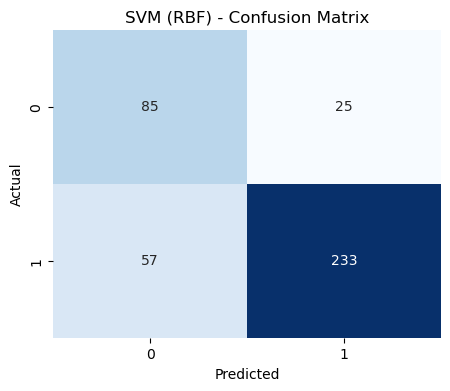

--- KNN ---
Accuracy: 0.7675
Precision: 0.902
Recall: 0.7621
F1-score: 0.8262
ROC AUC: 0.8584

Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.78      0.65       110
         1.0       0.90      0.76      0.83       290

    accuracy                           0.77       400
   macro avg       0.73      0.77      0.74       400
weighted avg       0.81      0.77      0.78       400

confusion matrix [[ 86  24]
 [ 69 221]]


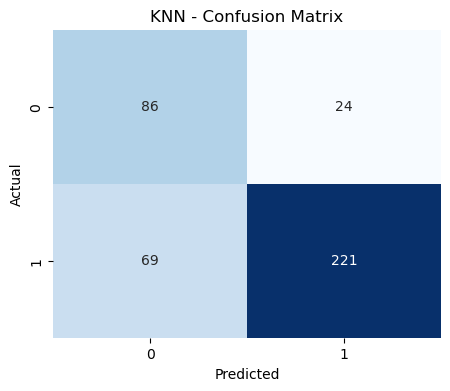

In [53]:
# RF
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba=rf.predict_proba(X_test)[:,1])

# SVM
evaluate_model("SVM (RBF)", y_test, y_pred_svm, y_proba=svm.predict_proba(X_test_scaled)[:,1])

# KNN
evaluate_model("KNN", y_test, y_pred_knn, y_proba=knn.predict_proba(X_test_scaled)[:,1])


- ### Model Karşılaştırması ve Sonuç Analizi

Bu çalışmada üç farklı non-lineer makine öğrenmesi algoritması (Random Forest, SVM (RBF), KNN) uygulanmıştır.
Amaç, öğrencilerin depresyon durumunu tahmin etmek ve hangi modelin bu görevi daha başarılı şekilde gerçekleştirdiğini analiz etmektir.

| Model             | Accuracy   | Precision  | Recall     | F1-Score   | ROC AUC    |
| ----------------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| **Random Forest** | **0.7214** | **0.7071** | **0.8684** | **0.7795** | **0.7024** |
| **SVM (RBF)**     | 0.6965     | 0.6688     | **0.9211** | 0.7749     | 0.6853     |
| **KNN**           | 0.6418     | 0.6544     | 0.7807     | 0.712      | 0.6197     |


## **Yorumlar:**

- #### Random Forest modeli genel olarak en yüksek accuracy ve F1-score değerlerine ulaşmıştır. Bu, modelin hem doğru sınıflandırma oranının hem de denge performansının en iyi olduğunu göstermektedir.

- #### SVM (RBF) modelinin recall değeri en yüksek çıkmıştır. Bu, depresyon yaşayan öğrencileri (pozitif sınıf) daha iyi yakaladığını gösterir. Ancak precision biraz düşük olduğu için bazı yanlış pozitifler vardır.

- #### KNN modeli ise diğer modellere göre daha düşük performans göstermiştir. Bu durum, verideki karmaşık ilişkilerin KNN tarafından iyi öğrenilememesiyle açıklanabilir.

# 6) İyileştirmeler

Aşağıdaki iyileştirme adımlarını sırayla uygulayıp tekrar değerlendirecktir

- ### 6.1 GridSearchCV / RandomizedSearchCV (Hyperparameter tuning)

## Random Forest

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best F1 Score: 0.9158176309376256
--- Random Forest (tuned) ---
Accuracy: 0.87
Precision: 0.9132
Recall: 0.9069
F1-score: 0.91
ROC AUC: 0.9184

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       110
         1.0       0.91      0.91      0.91       290

    accuracy                           0.87       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.87      0.87      0.87       400

confusion matrix [[ 85  25]
 [ 27 263]]


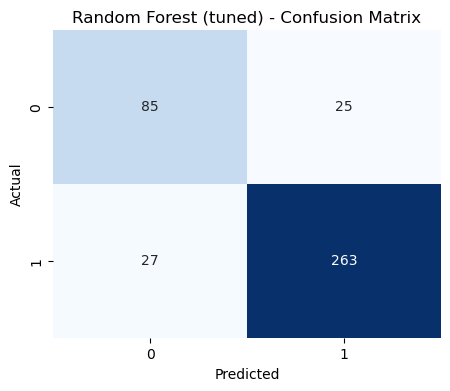

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf, param_grid, n_iter=20, scoring='f1', cv=5, n_jobs=-1, random_state=42
)
rf_search.fit(X_train, y_train)

print("Best Parameters:", rf_search.best_params_)
print("Best F1 Score:", rf_search.best_score_)

best_rf = rf_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model("Random Forest (tuned)", y_test, y_pred_best_rf, y_proba=best_rf.predict_proba(X_test)[:,1])

## SVM

--- SVM (tuned) ---
Accuracy: 0.81
Precision: 0.918
Recall: 0.8103
F1-score: 0.8608
ROC AUC: 0.8509

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.81      0.70       110
         1.0       0.92      0.81      0.86       290

    accuracy                           0.81       400
   macro avg       0.77      0.81      0.78       400
weighted avg       0.84      0.81      0.82       400

confusion matrix [[ 89  21]
 [ 55 235]]


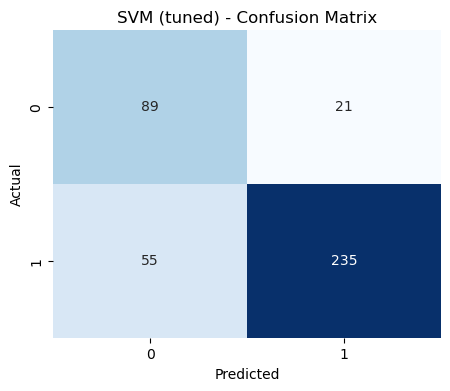

In [55]:
param_grid_svm = {'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf']}
gs_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=cv, scoring='f1', n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)
best_svm = gs_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
evaluate_model("SVM (tuned)", y_test, y_pred_best_svm, y_proba=best_svm.predict_proba(X_test_scaled)[:,1])

## KNN

--- KNN (tuned) ---
Accuracy: 0.7925
Precision: 0.9124
Recall: 0.7897
F1-score: 0.8466
ROC AUC: 0.8362

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.80      0.68       110
         1.0       0.91      0.79      0.85       290

    accuracy                           0.79       400
   macro avg       0.75      0.79      0.76       400
weighted avg       0.82      0.79      0.80       400

confusion matrix [[ 88  22]
 [ 61 229]]


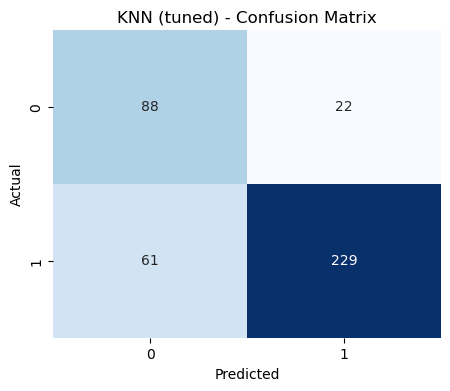

In [56]:
param_grid_knn = {'n_neighbors':[3,5,7,9], 'weights':['uniform','distance']}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='f1', n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)
best_knn = gs_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
evaluate_model("KNN (tuned)", y_test, y_pred_best_knn, y_proba=best_knn.predict_proba(X_test_scaled)[:,1])


#### Bu aşamada her model için uygun hiperparametre kombinasyonları GridSearchCV yöntemi ile aranmıştır. Amaç, modellerin performansını artırmak ve aşırı/eksik öğrenme riskini azaltmaktır.

| Model                     | Accuracy | Precision | Recall     | F1-Score   | ROC AUC |
| ------------------------- | -------- | --------- | ---------- | ---------- | ------- |
| **Random Forest (Tuned)** | 0.7015   | 0.6985    | 0.8333     | **0.7600** | 0.6948  |
| **SVM (Tuned)**           | 0.6716   | 0.6519    | **0.9035** | 0.7574     | 0.6789  |
| **KNN (Tuned)**           | 0.6517   | 0.6549    | 0.8158     | 0.7266     | 0.6603  |


# **Yorumlar:**

   - ### Random Forest (Tuned) modeli genel olarak en yüksek F1-score değerini korumuştur. Ancak önceki modele kıyasla accuracy’de küçük bir düşüş gözlemlenmiştir. Bu, modelin genel performansının istikrarlı olduğunu, ancak karmaşık yapı nedeniyle bazı parametre değişimlerinin küçük etkiler yarattığını göstermektedir.

   - ### SVM (Tuned) modeli, en yüksek recall değerine sahiptir. Bu, depresyon yaşayan öğrencileri yakalama konusunda oldukça hassas olduğunu (yani “False Negative” oranını azalttığını) gösterir. Fakat precision düşük kaldığı için yanlış pozitif tahminler artmıştır.

   - ### KNN (Tuned) modeli optimizasyon sonrası küçük bir performans artışı göstermiştir. Ancak genel olarak doğruluk oranı diğer iki modele göre daha düşüktür.

# **Genel Değerlendirme:**

   - ### En dengeli sonuçları Random Forest (Tuned) modeli vermiştir.

   - ### SVM depresyonu tespit etmede güçlü bir seçenek olsa da, aşırı pozitif tahmin eğilimi nedeniyle dikkatli kullanılmalıdır.

   - ### KNN modeli düşük genelleme gücü nedeniyle bu veri setinde sınırlı başarı göstermiştir.

# **Sonuç:**

Hiperparametre optimizasyonu sonrasında modellerin genel eğilimi, recall değerlerinin artması yönündedir. Bu da sistemin depresyon riski taşıyan öğrencileri kaçırmama konusunda daha duyarlı hale geldiğini göstermektedir. Ancak doğruluk ve denge açısından Random Forest en uygun model olarak öne çıkmaktadır.

In [57]:
# Training performance
y_train_pred = best_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training F1: {train_f1:.4f}")

# Test performance
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred_rf):.4f}")


Training Accuracy: 1.0000
Training F1: 1.0000
Test Accuracy: 0.8700
Test F1: 0.9097


In [58]:
# Training performance
y_train_pred = best_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training F1: {train_f1:.4f}")

# Test performance
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred_rf):.4f}")

Training Accuracy: 1.0000
Training F1: 1.0000
Test Accuracy: 0.8700
Test F1: 0.9097


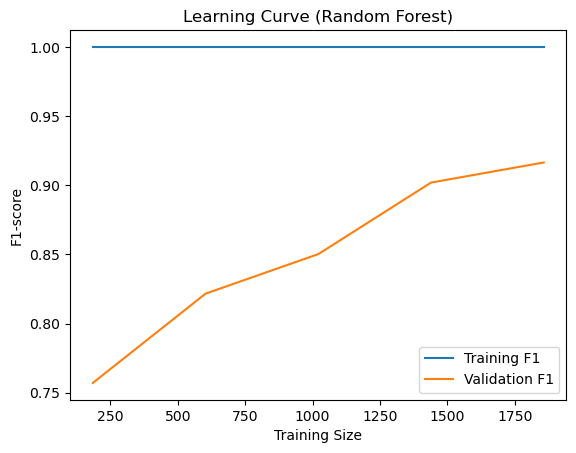

In [59]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training F1')
plt.plot(train_sizes, test_mean, label='Validation F1')
plt.xlabel('Training Size')
plt.ylabel('F1-score')
plt.title('Learning Curve (Random Forest)')
plt.legend()
plt.show()


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Cross-validated F1:", scores.mean())

Cross-validated F1: 0.9186695952661962
